In [13]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(0)

In [ ]:
df =pd.read_csv("data\cleaned_data.csv")
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,1,0,1,0,0,1,29.85,29.85,0,...,False,False,False,True,False,False,False,False,False,False
1,0,0,0,34,1,1,0,56.95,1889.50,0,...,False,True,False,False,False,True,False,False,False,False
2,0,0,0,2,1,0,1,53.85,108.15,1,...,False,True,False,True,False,False,False,False,False,False
3,0,0,0,45,0,1,0,42.30,1840.75,0,...,False,True,False,False,False,True,False,False,False,False
4,0,0,0,2,1,0,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,False,False


In [10]:

X = df[["MonthlyCharges", "tenure", "SupportCalls", "Contract"]]
y = df["Churn"]


In [8]:
data

,MonthlyCharges,tenure,TechSupport,Contract,Churn
0,29.85,1,No,Month-to-month,No
1,56.95,34,No,One year,No
2,53.85,2,No,Month-to-month,Yes
3,42.30,45,Yes,One year,No
4,70.70,2,No,Month-to-month,Yes
...,...,...,...,...,...
7038,84.80,24,Yes,One year,No
7039,103.20,72,No,One year,No
7040,29.60,11,No,Month-to-month,No
7041,74.40,4,No,Month-to-month,Yes


In [14]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)


In [15]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)
print(importances)

          Feature  Importance
0  MonthlyCharges    0.551077
1          tenure    0.280116
3        Contract    0.118627
2    SupportCalls    0.050181


In [17]:
# Given
customer = pd.DataFrame({
    "MonthlyCharges": [70],
    "tenure": [8],
    "SupportCalls": [4],   
    "Contract": [0]          
})

prediction = rf.predict(customer)[0]
probability = rf.predict_proba(customer)[0][1]

print("Prediction (0=No Churn, 1=Churn):", prediction)
print("Churn Probability:", round(probability, 2))


Prediction (0=No Churn, 1=Churn): 1
Churn Probability: 0.53


In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt


In [19]:

y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]


In [20]:

print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))


Accuracy: 0.756


In [21]:

print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84      1035
           1       0.55      0.45      0.49       374

    accuracy                           0.76      1409
   macro avg       0.68      0.66      0.67      1409
weighted avg       0.74      0.76      0.75      1409



In [ ]:

print("ROC AUC Score:", round(roc_auc_score(y_test, y_proba), 3))

ROC AUC Score: 0.783


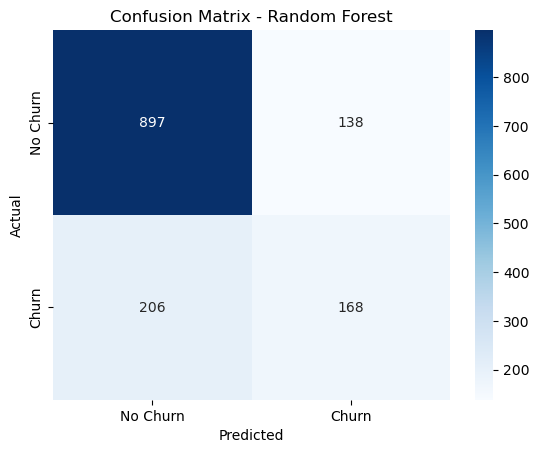

In [23]:

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn","Churn"], yticklabels=["No Churn","Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [24]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt", "log2"]
}

In [25]:
rf_tuned = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=20,            # number of random combinations
    cv=3,                 # 3-fold cross-validation
    scoring="roc_auc",    # optimize AUC
    n_jobs=-1,
    random_state=42,
    verbose=1
)

In [28]:
rf_tuned.fit(X_train, y_train)

print("Best Parameters:", rf_tuned.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
9 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    va

Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5}


In [29]:
best_rf = rf_tuned.best_estimator_
print(best_rf)

RandomForestClassifier(max_depth=5, min_samples_split=10, n_estimators=300,
                       random_state=42)


In [30]:
y_pred_tuned = best_rf.predict(X_test)
y_proba_tuned = best_rf.predict_proba(X_test)[:,1]

In [31]:
print("Accuracy:", round(accuracy_score(y_test, y_pred_tuned), 3))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba_tuned), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))

Accuracy: 0.793
ROC AUC: 0.84

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.87      1035
           1       0.66      0.46      0.54       374

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409

